# NBA Game Predictor

We will be using a Logistic Regression model to predict the outcome of NBA games

Note: The model I made just predicts the outcome of the game, before I tried to make a model predicting the score but it gave very poor results. You can maybe play around with my model or try a different one to get it to work for predicting total points

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as sm
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sqlite3

In [79]:
# Download the file basketball.sqlite, I added it to the github. Change the line
# below to whatever the filepath is where you save the file
#con = sqlite3.connect("/content/drive/My Drive/ECE539/basketball.sqlite")
#df = pd.read_sql_query("SELECT * from Game", con)

from google.colab import files
files.upload()

Output hidden; open in https://colab.research.google.com to view.

In [137]:
# open the dataset
with open('TRUE_FINAL_DATA.csv', 'r') as f: 
  df = pd.read_csv('TRUE_FINAL_DATA.csv')
df

,PAST_3_SHOOTING_HOME,PAST_10_SHOOTING_HOME,PAST_3_FT_HOME,PAST_10_FT_HOME,PAST_3_REB_HOME,PAST_10_REB_HOME,PAST_3_TOV_PCT_HOME,PAST_10_TOV_PCT_HOME,PAST_3_SHOOTING_AWAY,PAST_10_SHOOTING_AWAY,...,PAST_10_FT_AWAY,PAST_3_REB_AWAY,PAST_10_REB_AWAY,PAST_3_TOV_PCT_AWAY,PAST_10_TOV_PCT_AWAY,PAST_3_PTS_AWAY,PAST_10_PTS_AWAY,PAST_3_PTS_AWAY.1,PAST_10_PTS_HOME,WL_HOME
0,0.536145,0.522930,0.180723,0.224204,45.333333,41.9,0.115931,0.118119,0.508403,0.514212,...,0.263566,44.666667,41.7,0.118038,0.118783,35.666667,36.2,105.000000,100.0,W
1,0.495000,0.473143,0.163333,0.216000,49.333333,46.2,0.090473,0.106947,0.508403,0.514212,...,0.263566,44.666667,41.7,0.118038,0.118783,35.666667,36.2,105.000000,100.0,W
2,0.429435,0.481221,0.270161,0.232394,47.666667,43.6,0.077508,0.086146,0.536145,0.522930,...,0.224204,45.333333,41.9,0.115931,0.118119,39.000000,37.2,104.000000,99.7,W
3,0.465909,0.472864,0.219697,0.211316,51.666667,43.5,0.123653,0.108535,0.493852,0.483476,...,0.231334,38.000000,42.4,0.108887,0.108350,38.000000,37.0,96.000000,97.9,W
4,0.553571,0.515404,0.290179,0.241335,35.666667,40.2,0.120566,0.124033,0.518072,0.505938,...,0.206651,43.666667,42.7,0.090749,0.108844,37.333333,38.3,101.666667,102.6,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16336,0.597156,0.551916,0.213270,0.189122,35.000000,38.2,0.098016,0.093718,0.597403,0.580742,...,0.205742,41.666667,43.5,0.088101,0.097591,39.666667,41.5,111.333333,114.3,W
16337,0.496337,0.527313,0.216117,0.191750,46.000000,45.4,0.095709,0.097271,0.579245,0.538375,...,0.186230,49.666667,44.8,0.090017,0.088762,44.666667,41.7,119.000000,111.9,W
16338,0.488506,0.517523,0.137931,0.134346,44.333333,43.7,0.098039,0.105907,0.548043,0.550976,...,0.161605,44.000000,43.5,0.076093,0.082781,43.666667,44.8,115.666667,116.5,W
16339,0.562500,0.533019,0.157258,0.162736,43.666667,41.7,0.092067,0.092642,0.554299,0.543827,...,0.208642,38.333333,38.2,0.096344,0.088666,35.666667,38.3,98.000000,105.0,L


In [138]:
# Some data preprocessing, a lot of the older data has missing values or are too
# far in the past to be a relevant predictor so I just took all the data for the
# games from 2000 and on, it still gives a pretty good sample size
#n = 37275
#df = df.iloc[n:]

# Extract the features we want for the model, these are the stats that I felt
# are best to use. If you want to add any other features just add the name to
# the list, you can use the kaggle link to the dataset to see the column names
#features = ['PAST_3_SHOOTING_HOME', 'PAST_10_SHOOTING_HOME', 'PAST_3_FT_HOME', 'PAST_10_FT_HOME',
#           'PAST_3_REB_HOME', 'PAST_10_REB_HOME', 'PAST_3_TOV_PCT_HOME', 'PAST_10_TOV_PCT_HOME',
#           'PAST_3_SHOOTING_AWAY', 'PAST_10_SHOOTING_AWAY', 'PAST_3_FT_AWAY', 'PAST_10_FT_AWAY',
#           'PAST_3_REB_AWAY', 'PAST_10_REB_AWAY', 'PAST_3_TOV_PCT_AWAY', 'PAST_10_TOV_PCT_AWAY',
#            'PAST_3_PTS_HOME', 'PAST_10_PTS_HOME','PAST_3_PTS_AWAY', 'PAST_10_PTS_AWAY','WL_HOME']


#df = pd.DataFrame(tmp, columns=features)
# Several of the columns had their numbers in string format but needed to be
# converted to float for the model to work. It was giving me an error trying to
# convert from string to float, so the way around that I found was to convert to
# an int, then convert all the columns to floats. I also converted the home W/L
# to a 0 if its an L, 1 if its a W

df['WL_HOME'] = df['WL_HOME'].replace(['W'],np.int64(1))
df['WL_HOME'] = df['WL_HOME'].replace(['L'],np.int64(0))

# Convert string values to ints

    
# Convert ints to floats

# Display dataset statistics
df.describe(include='all').apply(lambda s: s.apply(lambda x: format(x))).transpose()
df

,PAST_3_SHOOTING_HOME,PAST_10_SHOOTING_HOME,PAST_3_FT_HOME,PAST_10_FT_HOME,PAST_3_REB_HOME,PAST_10_REB_HOME,PAST_3_TOV_PCT_HOME,PAST_10_TOV_PCT_HOME,PAST_3_SHOOTING_AWAY,PAST_10_SHOOTING_AWAY,...,PAST_10_FT_AWAY,PAST_3_REB_AWAY,PAST_10_REB_AWAY,PAST_3_TOV_PCT_AWAY,PAST_10_TOV_PCT_AWAY,PAST_3_PTS_AWAY,PAST_10_PTS_AWAY,PAST_3_PTS_AWAY.1,PAST_10_PTS_HOME,WL_HOME
0,0.536145,0.522930,0.180723,0.224204,45.333333,41.9,0.115931,0.118119,0.508403,0.514212,...,0.263566,44.666667,41.7,0.118038,0.118783,35.666667,36.2,105.000000,100.0,1
1,0.495000,0.473143,0.163333,0.216000,49.333333,46.2,0.090473,0.106947,0.508403,0.514212,...,0.263566,44.666667,41.7,0.118038,0.118783,35.666667,36.2,105.000000,100.0,1
2,0.429435,0.481221,0.270161,0.232394,47.666667,43.6,0.077508,0.086146,0.536145,0.522930,...,0.224204,45.333333,41.9,0.115931,0.118119,39.000000,37.2,104.000000,99.7,1
3,0.465909,0.472864,0.219697,0.211316,51.666667,43.5,0.123653,0.108535,0.493852,0.483476,...,0.231334,38.000000,42.4,0.108887,0.108350,38.000000,37.0,96.000000,97.9,1
4,0.553571,0.515404,0.290179,0.241335,35.666667,40.2,0.120566,0.124033,0.518072,0.505938,...,0.206651,43.666667,42.7,0.090749,0.108844,37.333333,38.3,101.666667,102.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16336,0.597156,0.551916,0.213270,0.189122,35.000000,38.2,0.098016,0.093718,0.597403,0.580742,...,0.205742,41.666667,43.5,0.088101,0.097591,39.666667,41.5,111.333333,114.3,1
16337,0.496337,0.527313,0.216117,0.191750,46.000000,45.4,0.095709,0.097271,0.579245,0.538375,...,0.186230,49.666667,44.8,0.090017,0.088762,44.666667,41.7,119.000000,111.9,1
16338,0.488506,0.517523,0.137931,0.134346,44.333333,43.7,0.098039,0.105907,0.548043,0.550976,...,0.161605,44.000000,43.5,0.076093,0.082781,43.666667,44.8,115.666667,116.5,1
16339,0.562500,0.533019,0.157258,0.162736,43.666667,41.7,0.092067,0.092642,0.554299,0.543827,...,0.208642,38.333333,38.2,0.096344,0.088666,35.666667,38.3,98.000000,105.0,0


In [139]:
df.iloc[:,:20] = (df.iloc[:,:20]-df.iloc[:,:20].mean())/df.iloc[:,:20].std()
df = df.to_numpy()
df

array([[ 0.71096884,  0.6561487 , -0.63475954, ...,  0.23183418,
        -0.35431934,  1.        ],
       [-0.30687108, -1.36116625, -0.99044655, ...,  0.23183418,
        -0.35431934,  1.        ],
       [-1.92881459, -1.03386312,  1.19461844, ...,  0.12298768,
        -0.39557257,  1.        ],
       ...,
       [-0.46752675,  0.43708064, -1.51002659, ...,  1.39286348,
         1.91460841,  1.        ],
       [ 1.3629527 ,  1.06494057, -1.11471042, ..., -0.5300913 ,
         0.33323452,  0.        ],
       [-0.5805801 ,  0.80655254, -0.14189074, ...,  0.55837367,
        -0.14805318,  0.        ]])

In [140]:
# Separate the features into X, y is the value we want to predict which is home
# win or loss.
X = df[:,:20]
y = df[:,20]

# I chose a 70/30 train/test split. random_state can be any number, it just fixes
# the results each time you run. If you want a different random selection and
# results each time, then just delete random_state.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Create the model.
model = LogisticRegression(max_iter=len(X_train))
print(X_train)
print(y_train)
# Fit the model using training data.
model = model.fit(X_train,y_train)

# Predict outcome based on model for test set.
y_pred = model.predict(X_test)

[[-1.27456851 -1.24695655  0.99709182 ... -0.19373215 -0.38496264
   0.1682216 ]
 [ 1.07896906  1.40941559 -0.6578942  ...  1.43280174 -0.20355181
   1.2545567 ]
 [ 1.32642987  1.94950817 -0.70752562 ...  0.77444278  0.41324501
   0.52574961]
 ...
 [-0.44861101  0.00986335 -0.20535024 ... -0.58100213 -0.4212448
  -0.89061135]
 [ 0.68864795 -0.70025376  1.79593047 ... -0.19373215  0.01414119
  -0.23055964]
 [ 0.88465253  1.61641604  0.74545042 ...  0.30971881  0.88491316
   1.33706316]]
[1. 0. 1. ... 1. 0. 0.]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


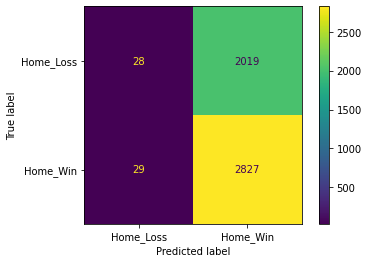

accuracy: 0.5822965531307362
R2 score: -0.7175753545189447


In [141]:
# Plot the confusion matrix
Labels = ['Home_Loss', 'Home_Win']
sm.plot_confusion_matrix(model, X_test, y_test,display_labels=Labels,values_format = '.5g')
plt.show()

# Display accuracy of model predictions
print("accuracy:",sm.accuracy_score(y_test, y_pred)) 
print("R2 score:",sm.r2_score(y_test,y_pred))